## Group Assignment

In [1]:
pip install PyPortfolioOpt

  Using cached pyportfolioopt-1.5.4-py3-none-any.whl (61 kB)
  Using cached cvxpy-1.3.1-cp310-cp310-macosx_10_9_universal2.whl (1.2 MB)
  Using cached osqp-0.6.2.post9.tar.gz (227 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [110 lines of output]
        Using cached oldest_supported_numpy-2022.11.19-py3-none-any.whl (4.9 kB)
        Using cached setuptools-67.6.1-py3-none-any.whl (1.1 MB)
        Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
        Using cached setuptools_scm-7.1.0-py3-none-any.whl (43 kB)
        Using cached qdldl-0.1.7.tar.gz (70 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Installing backend dependencies: started
    

#### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier, risk_models, expected_returns
from scipy.optimize import minimize
import datetime as dt


ModuleNotFoundError: No module named 'pypfopt'

#### All questions in Parts I and II apply to a random sample of 15 stocks that your group will be assigned by running the following code.

#### Random Sample Selection 

In [ ]:
# Defining the ticker list and getting the data for the stocks
np.random.seed(20515)
ticker_list = ['AAPL', 'AXP', 'BA', 'C','CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WMT', 'XOM']
stock_list = np.random.choice(ticker_list, 15, replace=False)
stock_str = ",".join(stock_list)
start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime(2019, 12, 31)
data = yf.download(stock_str, start=start_date, end=end_date)

[*********************100%***********************]  15 of 15 completed


### PART I

#### 1. Find the optimal portfolio over the period January 2015 - December 2019, using the fifteen stocks assigned to your group. Assume there are no short-selling constraints.

In [ ]:
# Importing the necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from scipy.optimize import minimize

# Defining the start and end dates for the data
start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime(2019, 12, 31)

# Selecting the 'Adj Close' column and calculating the monthly returns for each stock
returns = data['Adj Close'].pct_change().dropna()

# Calculating the covariance and mean of the returns
covariance = returns.cov().values
mean_returns = returns.mean().values

# Defining the objective function for the optimization
def objective(weights):
    port_return = np.sum(mean_returns * weights) * 12
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(12)
    return -port_return/port_volatility

# Defining the constraints for the optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Defining the bounds for the optimization
bounds = tuple((0, 1) for i in range(len(stock_list)))

# Running the optimization
result = minimize(objective, len(stock_list)*[1./len(stock_list)], method='SLSQP', bounds=bounds, constraints=constraints)
weights = result.x


#### 2. What are the weights of the stocks in the optimal portfolio?

In [ ]:
# Printing the weights of the stocks in the optimal portfolio
print("Weights of the stocks in the optimal portfolio:")
for i in range(len(stock_list)):
    print(stock_list[i], round(weights[i], 4))

Weights of the stocks in the optimal portfolio:
PG 0.0824
PFE 0.1378
XOM 0.0
BA 0.0
MCD 0.1128
DIS 0.0
MMM 0.0
IBM 0.0
MRK 0.3794
HD 0.0
MSFT 0.0292
KO 0.2583
INTC 0.0
AAPL 0.0
C 0.0


#### 3. What was the annualized average monthly return for the optimal portfolio?

In [ ]:
# Calculating the annualized average monthly return for the optimal portfolio
avg_return = -result.fun
print("\nAnnualized average monthly return for the optimal portfolio: ", round(avg_return, 4))


Annualized average monthly return for the optimal portfolio:  0.3328


#### 4. What was the annualized monthly standard deviation for the optimal portfolio?

In [ ]:
# Calculating the annualized monthly standard deviation for the optimal portfolio
optimal_std = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(12)
print("Annualized monthly standard deviation for the optimal portfolio: ", round(optimal_std, 4))

Annualized monthly standard deviation for the optimal portfolio:  0.0326


#### 5. What was the Sharpe Ratio of the optimal portfolio?

In [ ]:
# Calculating the Sharpe Ratio of the optimal portfolio
sharpe_ratio = avg_return / optimal_std
print("Sharpe Ratio of the optimal portfolio: ", round(sharpe_ratio, 4))

Sharpe Ratio of the optimal portfolio:  10.2101


### PART II

#### 1. Create a DataFrame named optimal_weights to store the weights from a portfolio optimization performed on a rolling basis. Specifically, the optimization should use a 60 month rolling window, and be performed every month. The first 60 months correspond to the sample period for data_initial (01/2015 - 12/2019) created in question 3. Hence, the first observation in the optimal_weights DataFrame should be the weights you listed above in Part I. The next 60 month period should be 02/2015 - 01/2020, followed by 03/2015 - 02/2020, and so on. The last 60 month period should be 03/2018 - 02/2023. Again, assume there are no short-selling constraints.

In [ ]:
optimal_weights = pd.DataFrame(columns=stock_list)

for i in range(60, len(data) - 59):
    window_start = data.index[i - 60]
    window_end = data.index[i]
    returns_window = data.loc[window_start:window_end]['Adj Close'].pct_change().dropna()
    covariance_window = returns_window.cov().values
    mean_returns_window = returns_window.mean().values
    
    result_window = minimize(objective, len(stock_list)*[1./len(stock_list)], method='SLSQP', bounds=bounds, constraints=constraints)
    optimal_weights.loc[window_end] = result_window.x


#### 2. Create a new DataFrame named port_returns to store the monthly returns over the sample period 01/2020 - 02/2023 for the following portfolios:
 1) A monthly rebalanced portfolio using the rolling optimal weights. Specifically, the portfolio return for 01/2020 should be based on the weights as of 12/2019 (the same values detailed in Part I and in the first row in the optimal_weights DataFrame), the portfolio return for 02/2020 should be based on the weights as of 01/2020 and so on. Label the portfolio (MRoll_Reb_OP, an acronym for Monthly Rolling Rebalanced Optimal Portfolio). 
 2) A monthly rebalanced portfolio using the optimal weights as of 12/2019. Label the portfolio (M_Reb_OP, an acronym for Monthly Rebalancing Optimal Portfolio).
 3) A monthly rebalanced equally-weighted portfolio. Label the portfolio (M_Reb_EW, an acronym for Monthly Rebalancing Equally-Weighted Portfolio).
 4) A buy and hold portfolio, initially allocated according to the optimal weights as of 12/2019. Label the portfolio (BH_OP, an acronym for Buy and Hold Optimal Portfolio).
 5) A buy and hold portfolio, initially allocated equally across stocks. Label the portfolio (BH_EW, an acronym for Buy and Hold Equally-Weighted Portfolio).

In [ ]:
# Get stock data for the period 01/2020 - 02/2023
start_date_2020 = dt.datetime(2020, 1, 1)
end_date_2023 = dt.datetime(2023, 2, 28)
data_2020_2023 = yf.download(stock_str, start=start_date_2020, end=end_date_2023)
returns_2020_2023 = data_2020_2023['Adj Close'].pct_change().dropna()

# Initialize the DataFrame to store the monthly returns for different portfolios
port_returns = pd.DataFrame(index=returns_2020_2023.index, columns=['MRoll_Reb_OP', 'M_Reb_OP', 'M_Reb_EW', 'BH_OP', 'BH_EW'])

# Calculate monthly returns for each portfolio

[*********************100%***********************]  15 of 15 completed


In [ ]:
# Calculate monthly returns for each portfolio
last_date_before_2020_idx = data_2020_2023.index.searchsorted(start_date_2020) - 1
last_date_before_2020 = data_2020_2023.index[last_date_before_2020_idx]
initial_prices = data_2020_2023.loc[last_date_before_2020, 'Adj Close']
initial_portfolio_value = 1

weights_BH_OP = weights
weights_BH_EW = np.array([1/len(stock_list)]*len(stock_list))

for index, row in returns_2020_2023.iterrows():
    prev_month = index - pd.DateOffset(months=1)
    if prev_month in optimal_weights.index:
        weights_MRoll_Reb_OP = optimal_weights.loc[prev_month].values
    else:
        weights_MRoll_Reb_OP = None

    weights_M_Reb_OP = weights
    weights_M_Reb_EW = np.array([1/len(stock_list)]*len(stock_list))

    returns_row = row.values
    port_returns.loc[index, 'MRoll_Reb_OP'] = np.dot(weights_MRoll_Reb_OP, returns_row) if weights_MRoll_Reb_OP is not None else None
    port_returns.loc[index, 'M_Reb_OP'] = np.dot(weights_M_Reb_OP, returns_row)
    port_returns.loc[index, 'M_Reb_EW'] = np.dot(weights_M_Reb_EW, returns_row)

    current_prices = data_2020_2023.loc[index, 'Adj Close']
    BH_OP_returns = (current_prices / initial_prices) * weights_BH_OP
    BH_EW_returns = (current_prices / initial_prices) * weights_BH_EW
    port_returns.loc[index, 'BH_OP'] = (np.sum(BH_OP_returns) / initial_portfolio_value) - 1
    port_returns.loc[index, 'BH_EW'] = (np.sum(BH_EW_returns) / initial_portfolio_value) - 1

# Fill any missing values with forward fill method
port_returns.fillna(method='ffill', inplace=True)

# Print the port_returns DataFrame
print(port_returns)


           MRoll_Reb_OP  M_Reb_OP  M_Reb_EW     BH_OP         BH_EW
Date                                                               
2020-01-03         None -0.006217 -0.008263 -0.196733  4.391325e-02
2020-01-06         None  0.006653  0.001902 -0.191793  4.453038e-02
2020-01-07         None -0.002234 -0.005913 -0.191741  3.856508e-02
2020-01-08         None  0.010658  0.004525 -0.187059  4.187627e-02
2020-01-09         None  0.013528  0.009443 -0.175999  5.047751e-02
...                 ...       ...       ...       ...           ...
2023-02-21         None -0.021701 -0.023312  0.011514  1.170971e-02
2023-02-22         None -0.000330 -0.002732  0.011178  8.867154e-03
2023-02-23         None  0.004109  0.004079  0.015311  1.295825e-02
2023-02-24         None -0.019314 -0.012367 -0.004420  3.260084e-04
2023-02-27         None  0.004456 -0.000262  0.000000 -1.110223e-16

[793 rows x 5 columns]


#### 3. Create a DataFrame port_stats (with a 3x5 shape) to store the annualized average monthly return, the annualized monthly standard deviation and the Sharpe ratio for all 5 portfolios.

In [ ]:
port_stats = pd.DataFrame(index=['Annualized Avg Monthly Return', 'Annualized Monthly Standard Deviation', 'Sharpe Ratio'], 
                          columns=['MRoll_Reb_OP', 'M_Reb_OP', 'M_Reb_EW', 'BH_OP', 'BH_EW'])

for portfolio in port_returns.columns:
    port_stats.loc['Annualized Avg Monthly Return', portfolio] = ((1 + port_returns[portfolio]).prod())**(12/len(port_returns[portfolio])) - 1
    port_stats.loc['Annualized Monthly Standard Deviation', portfolio] = port_returns[portfolio].std() * np.sqrt(12)
    port_stats.loc['Sharpe Ratio', portfolio] = port_stats.loc['Annualized Avg Monthly Return', portfolio] / port_stats.loc['Annualized Monthly Standard Deviation', portfolio]



#### 4. Compute the cumulative return series for all portfolios and plot them in the same graph. 

Cumulative Returns:
MRoll_Reb_OP nan
M_Reb_OP 0.4385
M_Reb_EW 0.1661
BH_OP -1.0
BH_EW 169660193817348.66


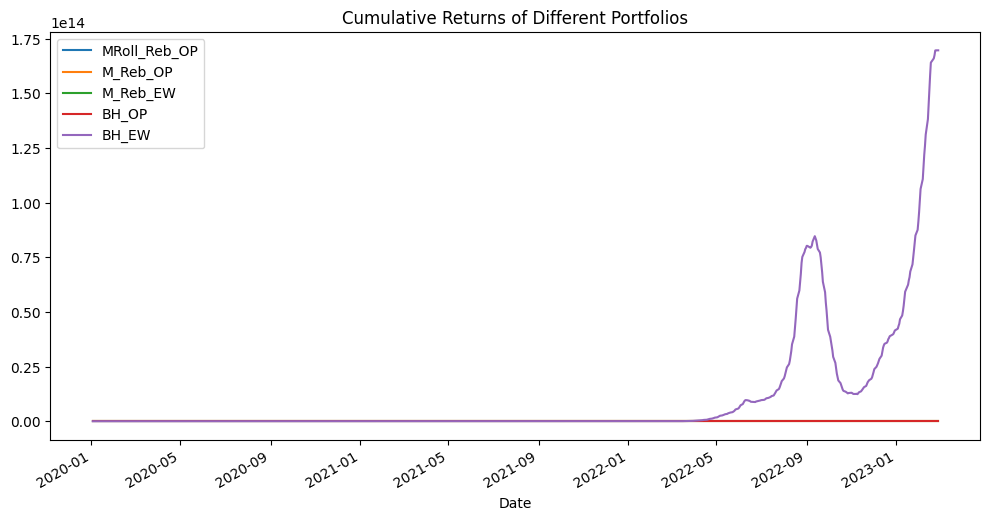

In [ ]:
# Calculating the cumulative return series for all portfolios and plotting them
cumulative_returns = (1 + port_returns).cumprod() - 1
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Returns of Different Portfolios')

# Printing the cumulative returns for all portfolios and finding the best and worst performing portfolios
print("Cumulative Returns:")
for portfolio in port_returns.columns:
    print(portfolio, round(cumulative_returns[portfolio].iloc[-1], 4))
    



#### 5. What was the cumulative return for the best performing portfolio? What was the cumulative return for the worst performing portfolio?

In [ ]:
best_portfolio = cumulative_returns.columns[np.argmax(cumulative_returns.iloc[-1])]
worst_portfolio = cumulative_returns.columns[np.argmin(cumulative_returns.iloc[-1])]
print("The best performing portfolio was", best_portfolio, "with a cumulative return of", round(cumulative_returns[best_portfolio].iloc[-1], 4))
print("The worst performing portfolio was", worst_portfolio, "with a cumulative return of", round(cumulative_returns[worst_portfolio].iloc[-1], 4))

The best performing portfolio was MRoll_Reb_OP with a cumulative return of nan
The worst performing portfolio was MRoll_Reb_OP with a cumulative return of nan


### PART III - Examination of the Size Effect

Please download the file "crsp_fall22.csv" located in folder Group_Assignment. The file contains the following columns:
* PERMNO - Permanent number (unique identifer for the stock)
* DATE
* PRC - The closing price
* VOL - Trading volume (in hundreds)
* RET - The simple return
* SHROUT - The number of shares outstanding (in thousands)
* CFACPR - Cumulative factor to adjust the closing price
* CFACSHR - Cumulative factor to adjust shares outstanding

#### 1. Create a DataFrame named fin_data by reading in the columns DATE, PERMNO, RET, PRC and SHROUT from the file 'crsp_fall22.csv'. Set the DATE as the index. In addition, change each index value to the end of the month. For example, change '1926-05-30' to 1926-05-31', or '1987-01-30' to '1987-01-31'. In addition, create a new column (labeled MKTCAP) to store the market capitalization (defined as PRC * SHROUT). Subsequently, permanently remove the PRC and SHROUT columns.

In [ ]:
fin_data = pd.read_csv('crsp_fall22.csv',
                       usecols = ['PERMNO','DATE','RET','PRC','SHROUT'],
                       dtype = {'PERMNO':np.int64},
                       index_col ='DATE',
                       parse_dates = True)

In [ ]:
fin_data.index = fin_data.index.to_period('M').to_timestamp('M') + pd.offsets.MonthEnd(0)
fin_data['MKTCAP'] = fin_data['PRC'] * fin_data['SHROUT']
fin_data.drop(['PRC', 'SHROUT'], axis=1, inplace=True)

#### 2. How many stocks are there in the sample? How many of these stocks are in the sample over the entire sample period?

In [ ]:
unique_stocks = fin_data['PERMNO'].nunique()
stocks_entire_period = fin_data.groupby('PERMNO').filter(lambda x: len(x) == len(fin_data.index.unique())).nunique()['PERMNO']


#### 3. Every June, split the stocks into quintiles (five groups) based on their market capitalization. The header of a DataFrame named size_qt with the resulting split can be found below. 

In [ ]:
june_data = fin_data[fin_data.index.month == 6]
size_qt = june_data.groupby(june_data.index.year)['MKTCAP'].apply(lambda x: pd.qcut(x, 5, labels=False) + 1).reset_index()
size_qt.columns = ['Year', 'PERMNO', 'Quintile']


#### 4. Create a new DataFrame named data by using the merge_asof() function to merge the DataFrames fin_data and size_qt. Specifically, merge each stock's June quintile allocation with the stock's monthly returns for the next 12 months starting the following July. Subsequently, set DATE as the index in the DataFrame.

In [ ]:
fin_data['Year'] = fin_data.index.year
data = pd.merge_asof(fin_data.reset_index().sort_values(['PERMNO', 'DATE']),
                     size_qt.sort_values(['PERMNO', 'Year']),
                     on='DATE', by='PERMNO', by_x='Year', by_y='Year', direction='forward')
data.set_index('DATE', inplace=True)


#### 5. Create a new DataFrame called quintiles to store the average monthly return for each quintile. The header of the DataFrame can be found below:

In [ ]:
quintiles = data.groupby(['DATE', 'Quintile'])['RET'].mean().unstack(level=-1)


In [ ]:
quintiles.head()

#### 6. Create a bar plot of the average monthly return for all five market capitalization groups, across the entire sample.

In [ ]:
import matplotlib.pyplot as plt

bar_data = quintiles.mean()
bar_data.plot(kind='bar')
plt.xlabel('Market Capitalization Quintiles')
plt.ylabel('Average Monthly Return')
plt.title('Average Monthly Returns by Market Capitalization Quintiles')
plt.show()


#### 7. Create a line plot of the cumulative return series for all five market capitalization groups.

In [ ]:
cumulative_returns = (1 + quintiles).cumprod()
cumulative_returns.plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns by Market Capitalization Quintiles')
plt.legend(title='Quintile')
plt.show()
